# 1. Introduction

<!-- Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai. -->

```

Objective   : 

This program is made to carry out Customer Segmentation from a bank's credit card data from Google BigQuery.


```

# 2. Query SQL

``` sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_015_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 1

```

# 3. Import Libraries

In [366]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy import stats


# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# model clustering
from sklearn.cluster import KMeans

# Library handling outlier
from feature_engine.outliers import Winsorizer
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Save model
import pickle

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# 4. Data Loading

In [367]:
# Data Loading

data = pd.read_csv('Clustering.csv')
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       21

Loading the CSV saved data from BigQuery

In [368]:
data.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

Showing first 10 data

In [369]:
data.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

Showing last 10 data

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

All of the data have numeric format type

In [371]:
data.shape

(4475, 18)

There is 4475 row and 18 columns on DataFrame

# 5. Exploratory Data Analysis (EDA)

In [372]:
# Duplicate Dataset
data_duplicate = data.copy()

Create duplicate dataset as restore point

In [373]:
# Cek Duplikat
print(f'Duplicate Data : {data.duplicated().sum()}')

Duplicate Data : 0


There is no duplicate data on DataFrame

In [374]:
print(f'Missing Value Data :')
print(f'{data.isna().sum()}')

Missing Value Data :
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


There is 155 missing value on MINIMUM_PAYMENT, so we will handle it later on Feature Engineering

<Axes: >

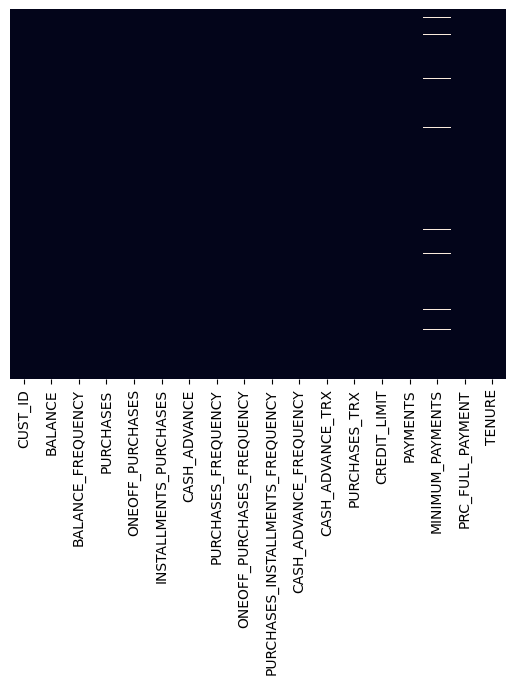

In [375]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False)

Showing the visualisation of missing value

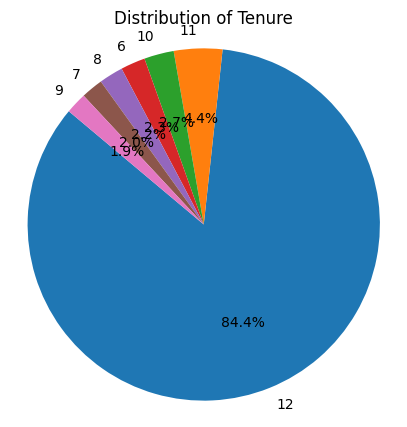

In [376]:
# Count the frequency of each unique value in the 'TENURE' column
tenure_counts = data['TENURE'].value_counts()

# Create a pie plot
plt.figure(figsize=(5, 5))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tenure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

We can see from the visualisation there is 84,4% of distribution on 12 month Tenure meanwhile less than 5% for 6, 7, 8, 9, 10, 11 Tenure

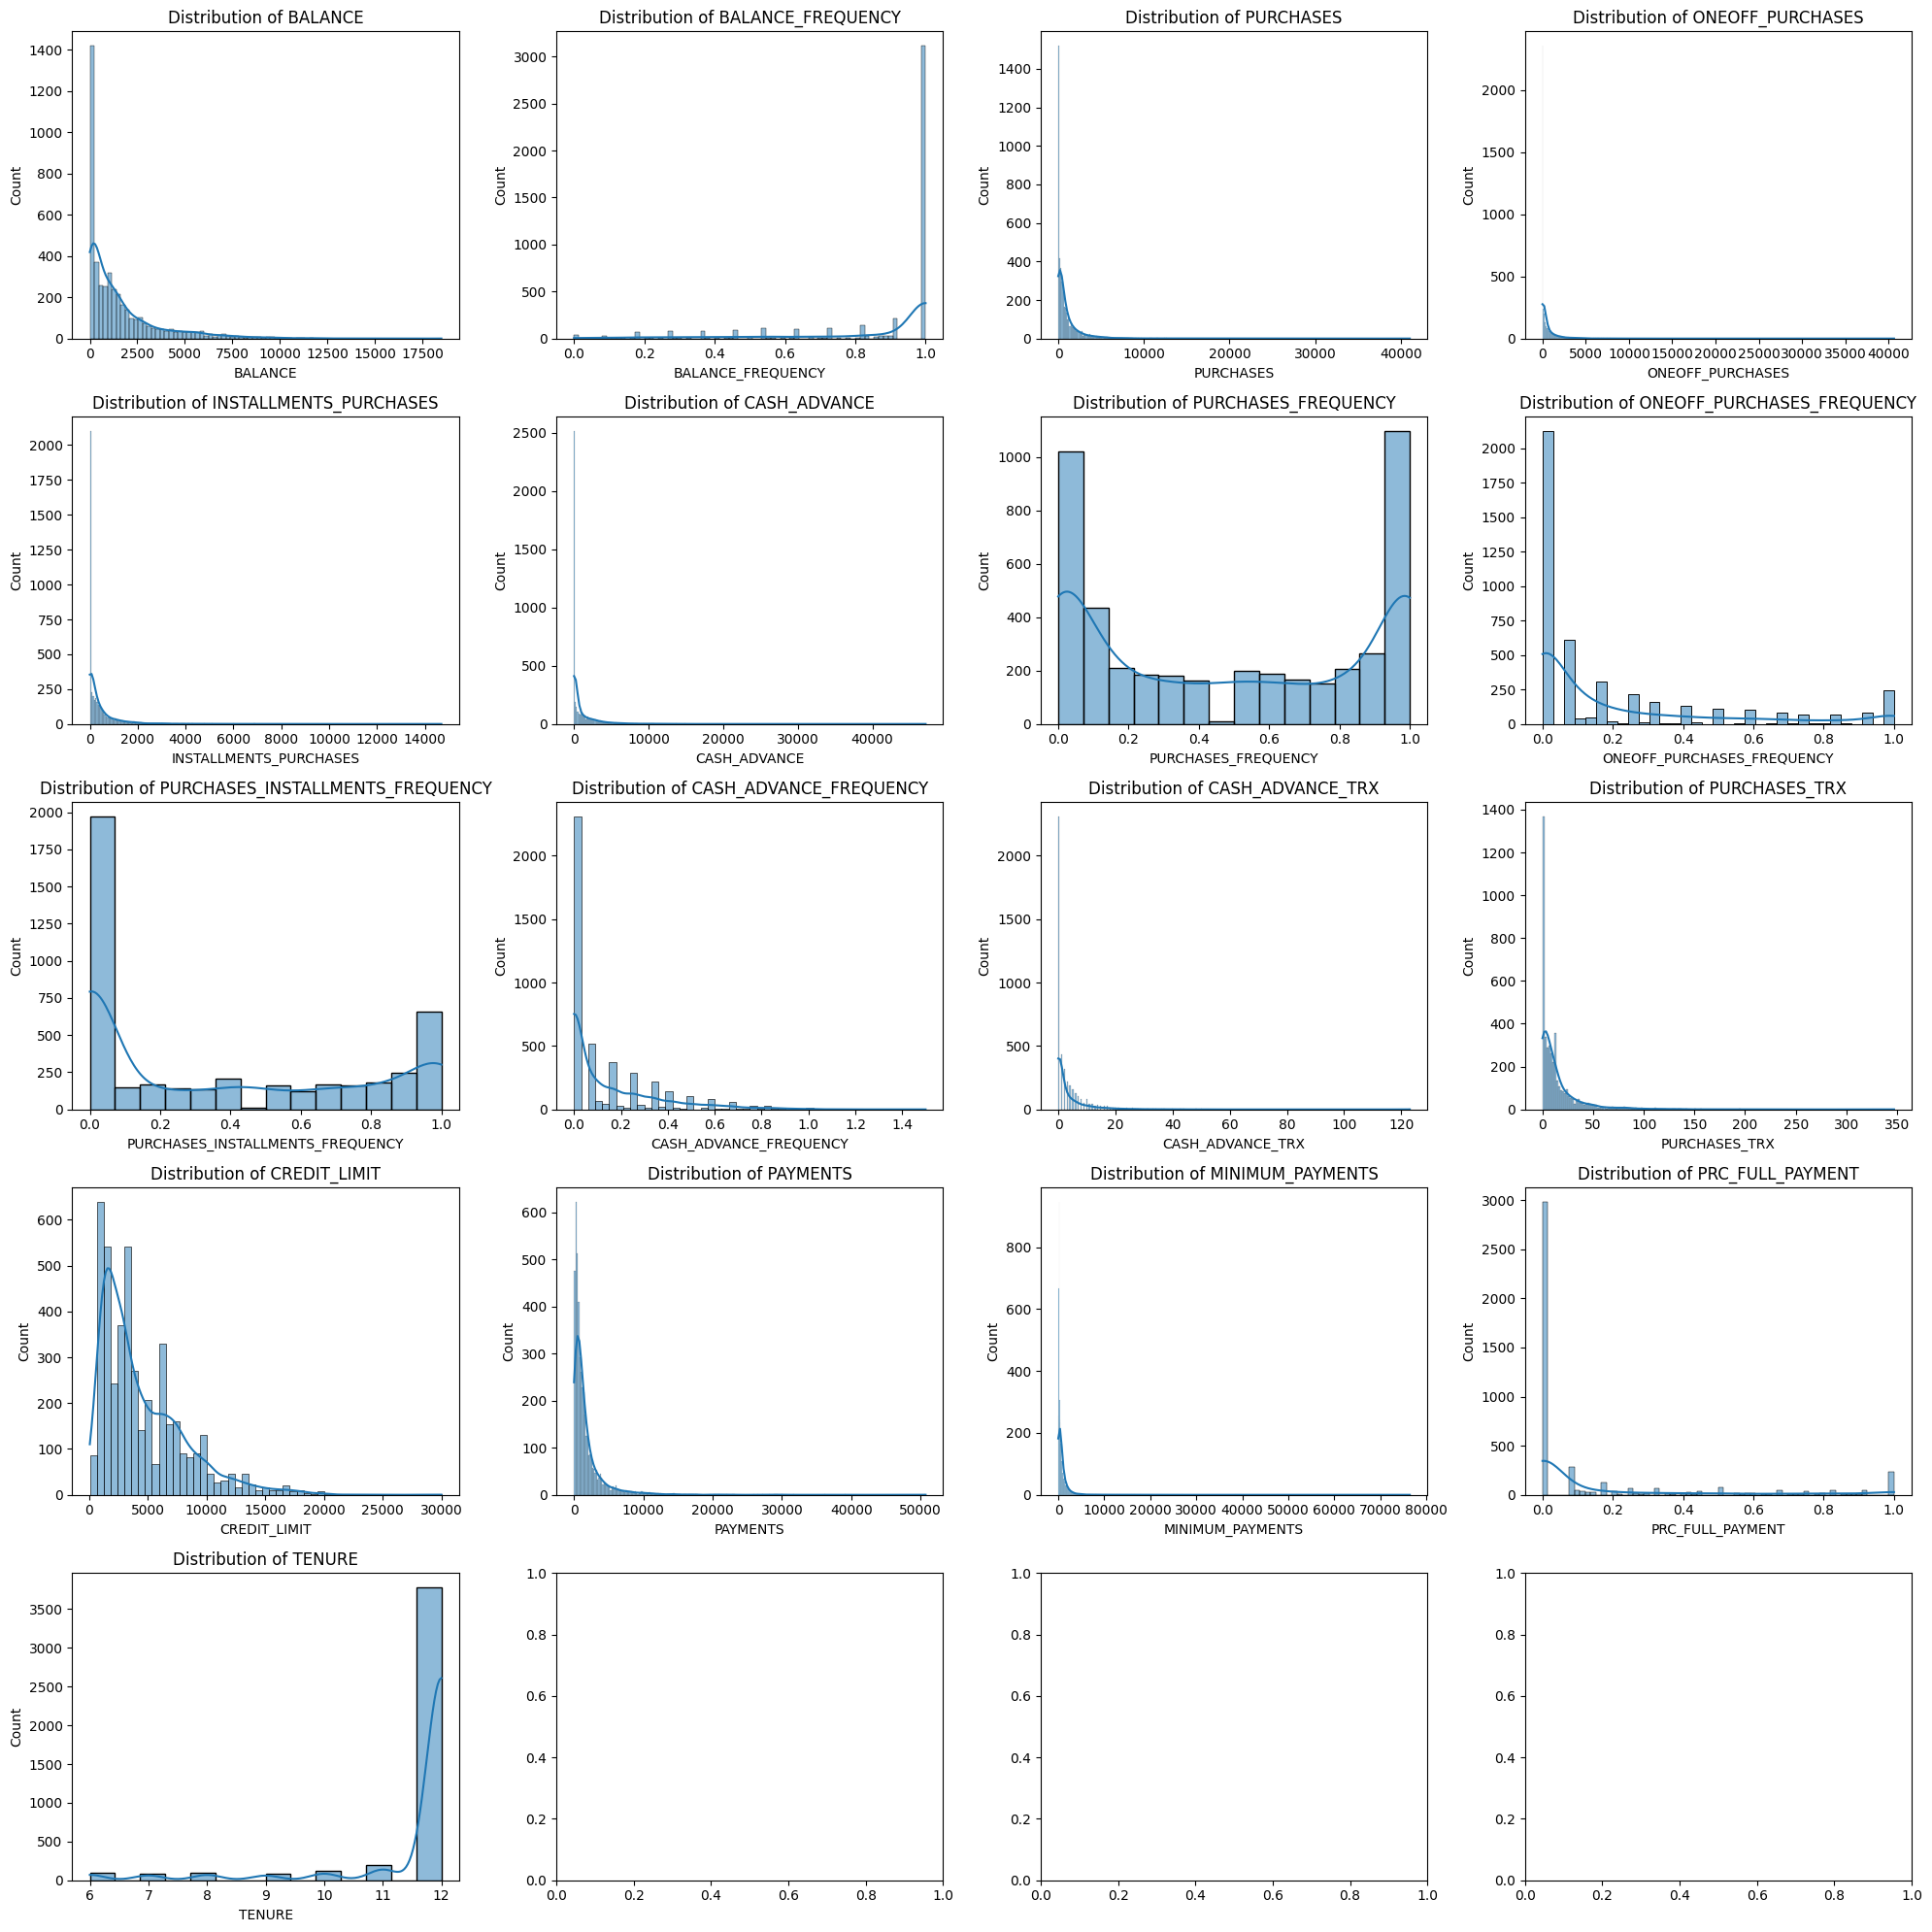

In [377]:
distribution = data.drop(columns=['CUST_ID'])

# Set up the figure and axes
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Iterate through each column and plot its distribution
for i, col in enumerate(distribution.columns):
    sns.histplot(distribution[col], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

From the visualisation above we know the data is skewed and have high kurtosis. So it means the data have so much outlier so we can handle it later in Feature Engineering

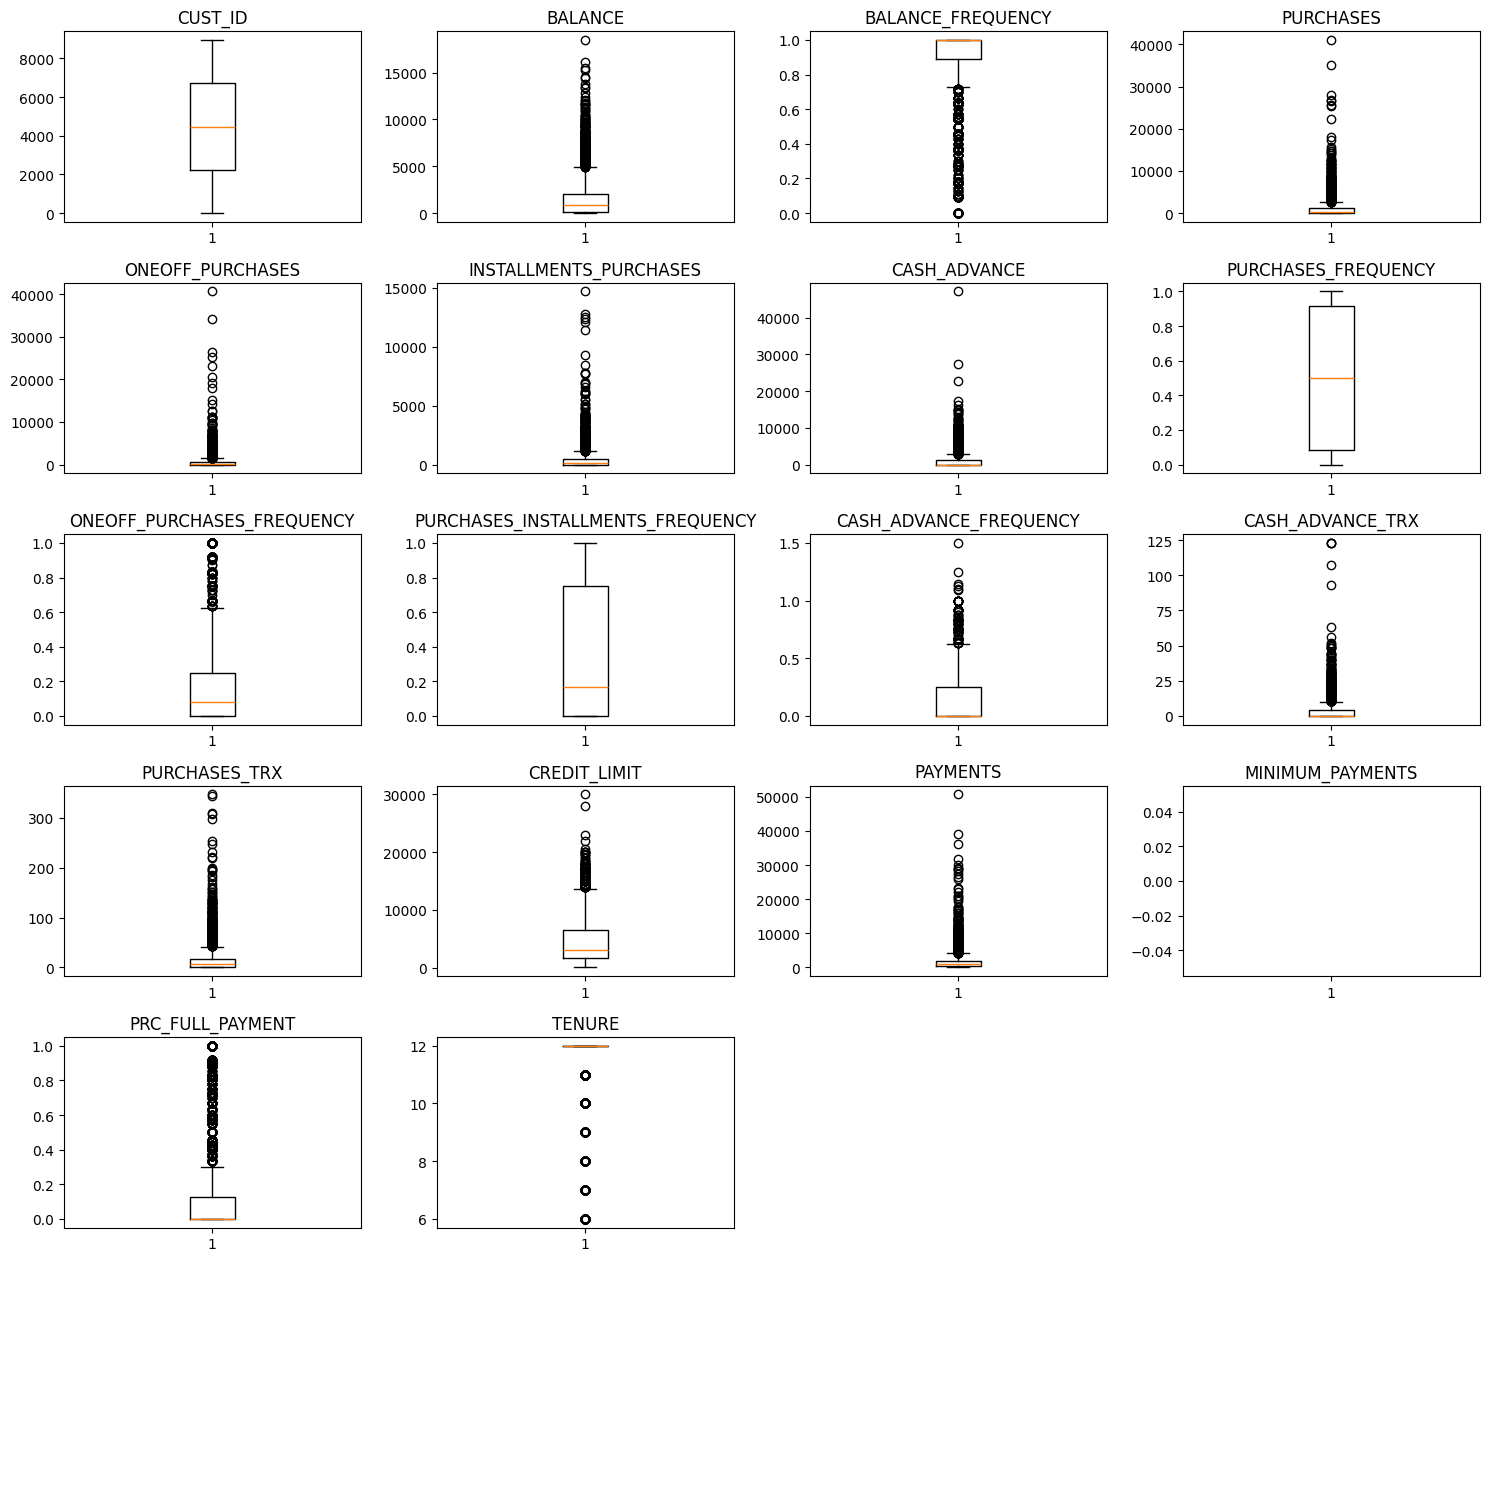

In [378]:
# list kolom
num_col = data.columns
# plot figure
fig, axes = plt.subplots(6, 4, figsize=(15, 15))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(num_col):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(num_col), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

Showing the visualisation of outlier in every columns

In [379]:
# IQR outlier detection function
def deteksi_outlier(df, threshold=1.5):
    ''' Fungsi IQR
    Perameters:
    - df (pandas Dataframe)
    - threshold penyesuaian iqr

    penggunaan:
    - deteksi_outlier(df=data)'''
    outliers= {}
    percentages = {}

    for col in df.columns:
        if df[col].dtypes != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)

            iqr = (q3 - q1)

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            check_outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col]= len(check_outlier)

            if len(df[col]) != 0:
                percentage_outlier = len(check_outlier) * 100 / len(df[col])
            else:
                percentage_outlier = 0

            percentages[col] = "{:.2f}%".format(percentage_outlier)

    data = pd.DataFrame({
        'Column Name': list(outliers.keys()),
        'Outlier Percentage': list(percentages.values())
    })

    return data


Checking the outliers using IQR Method

In [380]:
# define outlier dataframe
outlier = deteksi_outlier(df=data)
outlier

Column Name Outlier Percentage
0                            CUST_ID              0.00%
1                            BALANCE              8.02%
2                  BALANCE_FREQUENCY             16.72%
3                          PURCHASES              9.47%
4                   ONEOFF_PURCHASES             11.69%
5             INSTALLMENTS_PURCHASES              9.88%
6                       CASH_ADVANCE             11.26%
7                PURCHASES_FREQUENCY              0.00%
8         ONEOFF_PURCHASES_FREQUENCY             12.45%
9   PURCHASES_INSTALLMENTS_FREQUENCY              0.00%
10            CASH_ADVANCE_FREQUENCY              3.84%
11                  CASH_ADVANCE_TRX              8.98%
12                     PURCHASES_TRX              8.94%
13                      CREDIT_LIMIT              2.68%
14                          PAYMENTS              9.25%
15                  MINIMUM_PAYMENTS              9.85%
16                  PRC_FULL_PAYMENT             17.81%
17                            TENURE             15.60%

As we see on above there's outlier in every columns with 4 columns above 10% outlier. CUST_ID, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY have no outlier

# 6. Feature Engineering

## Checking Cardinality

In [381]:
# cek nilai unik di setiap kolom
data.nunique().to_frame().reset_index().rename(columns={'index':'Column Name',0:'Unique Value'})

Column Name  Unique Value
0                            CUST_ID          4475
1                            BALANCE          4433
2                  BALANCE_FREQUENCY            43
3                          PURCHASES          3203
4                   ONEOFF_PURCHASES          2093
5             INSTALLMENTS_PURCHASES          2292
6                       CASH_ADVANCE          2169
7                PURCHASES_FREQUENCY            46
8         ONEOFF_PURCHASES_FREQUENCY            45
9   PURCHASES_INSTALLMENTS_FREQUENCY            47
10            CASH_ADVANCE_FREQUENCY            51
11                  CASH_ADVANCE_TRX            52
12                     PURCHASES_TRX           150
13                      CREDIT_LIMIT           158
14                          PAYMENTS          4362
15                  MINIMUM_PAYMENTS          4319
16                  PRC_FULL_PAYMENT            47
17                            TENURE             7

- CUST_ID have High Cardinality, but since we don't need it for our analysis, we can drop it.
- TENURE have the lowest cardinality 

## Checking Distribution

In [382]:
data.describe().T

count         mean          std        min  \
CUST_ID                           4475.0  4475.000000  2583.931114   1.000000   
BALANCE                           4475.0  1563.205717  2072.045789   0.000000   
BALANCE_FREQUENCY                 4475.0     0.876933     0.238222   0.000000   
PURCHASES                         4475.0  1003.251343  2060.034730   0.000000   
ONEOFF_PURCHASES                  4475.0   596.369893  1653.425984   0.000000   
INSTALLMENTS_PURCHASES            4475.0   407.110215   880.799744   0.000000   
CASH_ADVANCE                      4475.0   984.288554  2060.448056   0.000000   
PURCHASES_FREQUENCY               4475.0     0.490579     0.402907   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202301     0.298203   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.363886     0.397603   0.000000   
CASH_ADVANCE_FREQUENCY            4475.0     0.136132     0.201036   0.000000   
CASH_ADVANCE_TRX                  4475.0     3.301229     7.134727   0.000000   
PURCHASES_TRX                     4475.0    14.929162    25.540814   0.000000   
CREDIT_LIMIT                      4475.0  4494.878630  3609.267706  50.000000   
PAYMENTS                          4475.0  1740.075430  2827.633858   0.000000   
MINIMUM_PAYMENTS                  4320.0   873.976757  2436.877272   0.019163   
PRC_FULL_PAYMENT                  4475.0     0.150224     0.289081   0.000000   
TENURE                            4475.0    11.518212     1.328925   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2238.000000  4475.000000  6712.000000   
BALANCE                            124.432849   871.355430  2047.570799   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.560000   360.000000  1102.420000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.220000   
INSTALLMENTS_PURCHASES               0.000000    88.620000   455.885000   
CASH_ADVANCE                         0.000000     0.000000  1138.887754   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           376.913051   877.494612  1911.596530   
MINIMUM_PAYMENTS                   168.590144   313.980229   819.371080   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Showing the summary statistic from dataset

## Handling Missing Value

In [383]:
data.dropna(inplace=True)

Dropping the missing value of the dataset

## Drop Unnecessary Column

In [384]:
data.drop('CUST_ID', axis=1, inplace=True)

Because we don't need CUST_ID for analysis we can drop the column

## Handling Outlier

In [385]:

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in data.columns:
    skewness = data[kolom].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

In [386]:
# Tampilkan data normal
pd.DataFrame(data=data_numerik_normal, columns=['kolom_terdistribusi_normal', 'skewness'])

kolom_terdistribusi_normal  skewness
0               PURCHASES_FREQUENCY  0.030477
1  PURCHASES_INSTALLMENTS_FREQUENCY  0.489101

The skewness values indicate that both columns are normally distributed, as their skewness values are between -0.5 and 0.5.

In [387]:
# Tampilkan data skew
pd.DataFrame(data=data_numerik_skewed, columns=['kolom_skewed', 'skewness'])

kolom_skewed   skewness
0                      BALANCE   2.306056
1            BALANCE_FREQUENCY  -2.085656
2                    PURCHASES   6.982698
3             ONEOFF_PURCHASES   9.827307
4       INSTALLMENTS_PURCHASES   6.252820
5                 CASH_ADVANCE   5.611537
6   ONEOFF_PURCHASES_FREQUENCY   1.514243
7       CASH_ADVANCE_FREQUENCY   1.802858
8             CASH_ADVANCE_TRX   6.352409
9                PURCHASES_TRX   4.694067
10                CREDIT_LIMIT   1.487941
11                    PAYMENTS   5.720099
12            MINIMUM_PAYMENTS  14.669771
13            PRC_FULL_PAYMENT   1.918902
14                      TENURE  -3.026040

The skewness values indicate that almost all columns have a positive skew meaning that the tail of the distribution is longer on the right side, and 2 columns `(BALANCE_FREQUENCY, TENURE)` have negative skew meaning that the tail of the distribution is longer on the left side. These columns may need to be transformed to better meet the assumptions of normality

In [388]:
# Input low variation columns into variable
kolom_low_variation = ['TENURE']

# Drop the low variation columns in skewed columns, and add it into normal distribution columns
for kolom in kolom_low_variation:
    kolom_numerik_skewed.remove(kolom) #-> removing low variation columns in skewed columns
    kolom_numerik_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [389]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming df
df_capped = winsorizer_normal_dist.fit_transform(data)

In [390]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
df_capped = winsorizer_skewed.fit_transform(data)

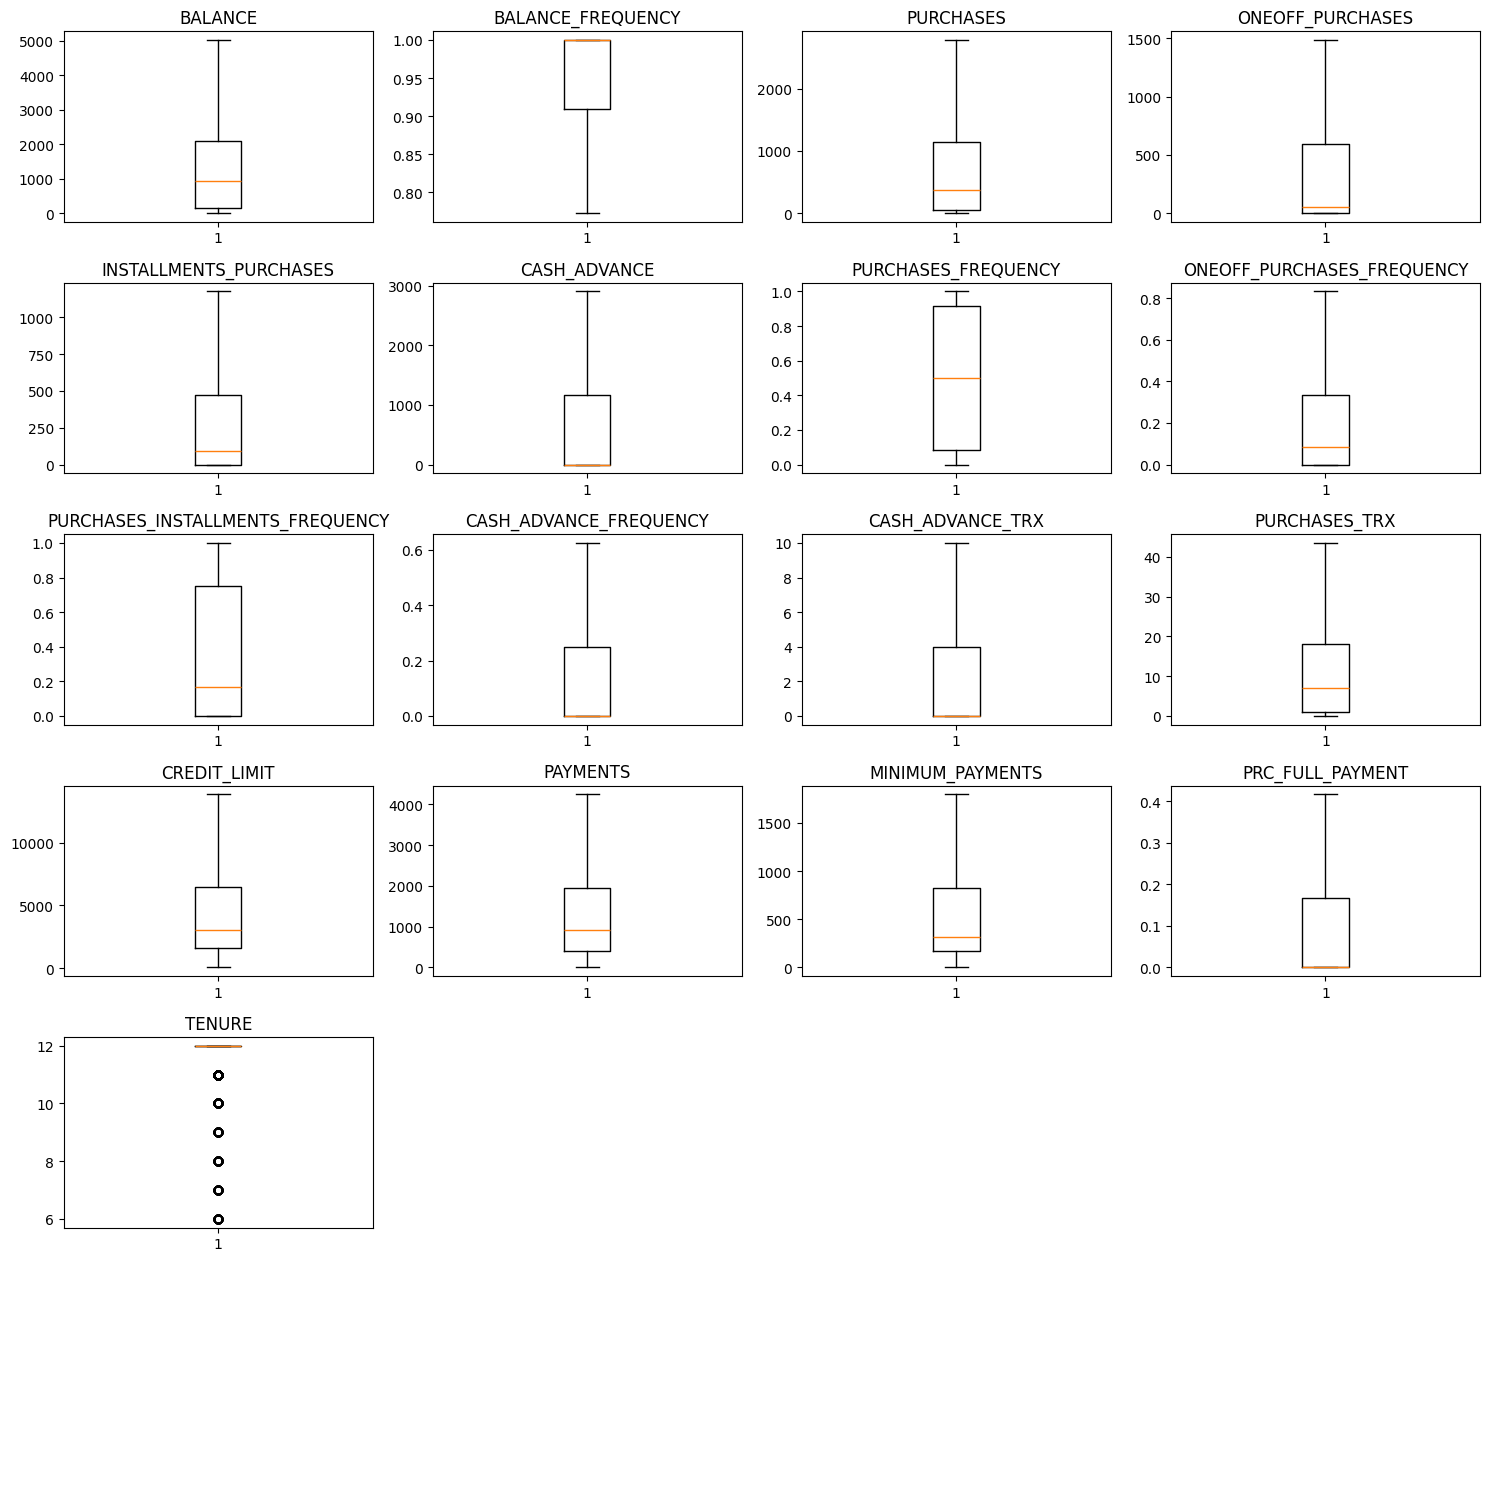

In [391]:
# plot figure
fig, axes = plt.subplots(6, 4, figsize=(15, 15))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(df_capped.columns):
    axes[i].boxplot(df_capped[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(df_capped.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

Showing the visualisation of the data after outlier handling process

## Scalling

Because we will working with clustering algorithms such as KMeans so we will use the StandardScaler

In [392]:
#Initialize the MinMaxScaler
scaler = StandardScaler()

#Fit_transform for X_train, transform for X_test
df_scaled = scaler.fit_transform(df_capped)
df_scaled

array([[-0.43183274, -0.77634448, -0.66131026, ...,  2.16076294,
        -0.62129676, -2.72673356],
       [-0.74721134, -1.90569989,  0.43715591, ..., -0.87203811,
        -0.62129676, -2.72673356],
       [-0.6346826 ,  0.60398186, -0.17150457, ..., -0.77907896,
        -0.62129676, -2.72673356],
       ...,
       [-0.07077989,  0.60398186, -0.83549782, ..., -0.46874378,
        -0.62129676, -0.41415801],
       [-0.23852263,  0.60398186, -0.83549782, ..., -0.53214603,
        -0.62129676, -0.41415801],
       [ 1.28742135,  0.60398186, -0.60863346, ...,  0.42686469,
        -0.62129676, -0.41415801]])

Data have succesfully scaled

## Dimensionality Reduction

Using PCA method to reduce the dimension

In [393]:
# fit df_scaled dengan pca untuk plot cumulative variance
pca = PCA()
pca.fit(df_scaled)

PCA()

We will use 95% features of Cummulative Variance Ratio to make it easier to read pattern by model so the features that are compressed not too much and still maintain the quality of the information taken by the model

Text(0, 0.5, 'Eigenvalues')

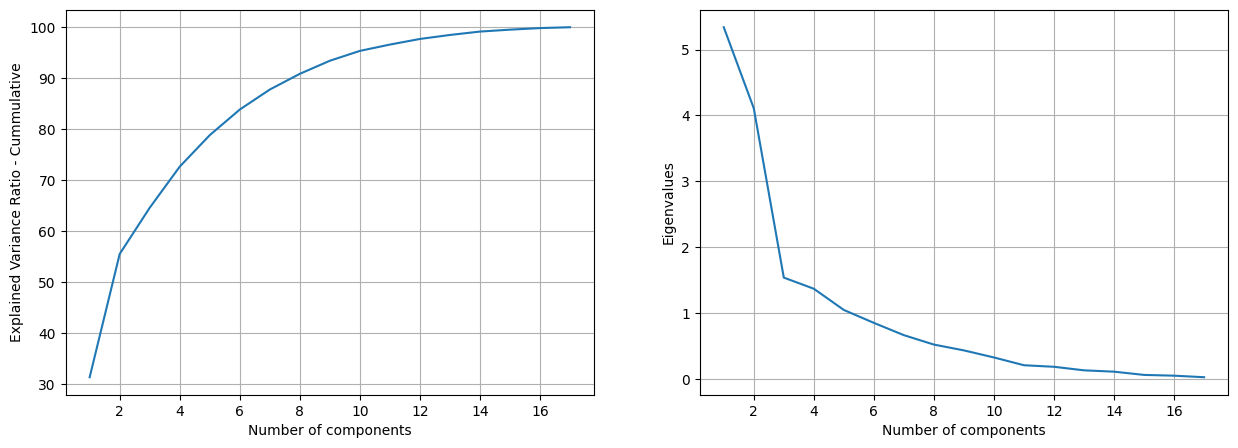

In [394]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Based on the variance ratio, to get 95% of the features we can compressed it to 10

In [395]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print('Features: ',num_features)

Features:  10


Showing the number of feature if we retain 95% of the information

In [396]:
# Let's train the model with 90 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)


Finish to train the model with 95 % of the original dataset information

# 7. Model Definition

To find the optimal number of cluster we will find between 2 clusters and 15 clusters using Elbow and Silhoutte Method. And we are using KMeans because its simple and efficient, scalability, fast convergence and easy interpretation

## Elbow Method

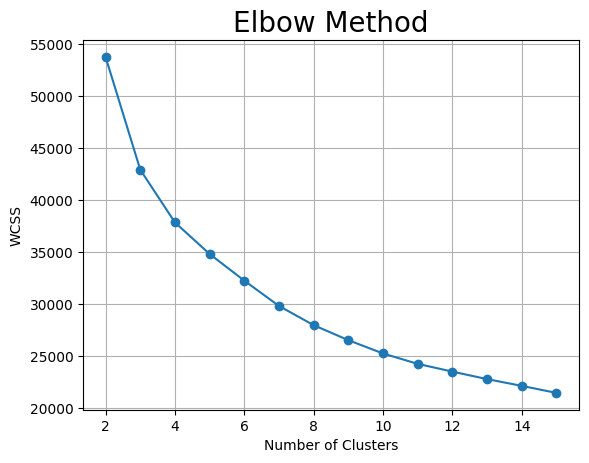

In [397]:
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the plot above, the location of the elbow is in cluster 3.

## Silhoutte Method

In [398]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.2311131649137291
For n_clusters = 3 The average silhouette_score is : 0.2396058650067568
For n_clusters = 4 The average silhouette_score is : 0.2096014335419744
For n_clusters = 5 The average silhouette_score is : 0.20321117518054616
For n_clusters = 6 The average silhouette_score is : 0.2074335273564521
For n_clusters = 7 The average silhouette_score is : 0.21890752842616173
For n_clusters = 8 The average silhouette_score is : 0.21995446934057675
For n_clusters = 9 The average silhouette_score is : 0.21259461279381675
For n_clusters = 10 The average silhouette_score is : 0.2112203029888242
For n_clusters = 11 The average silhouette_score is : 0.21050109364223274
For n_clusters = 12 The average silhouette_score is : 0.206877652241537
For n_clusters = 13 The average silhouette_score is : 0.21020144187252482
For n_clusters = 14 The average silhouette_score is : 0.20711398489232424


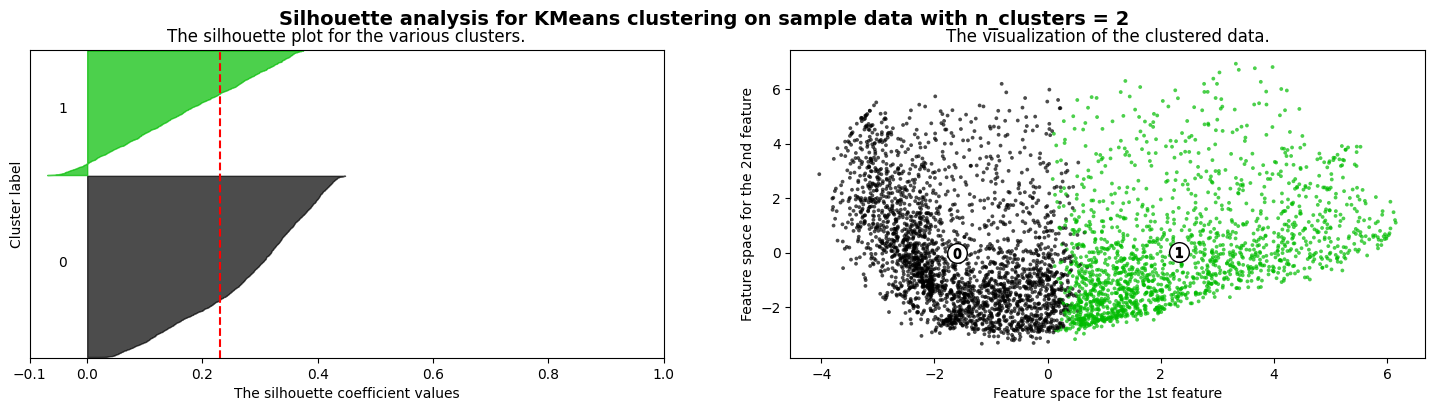

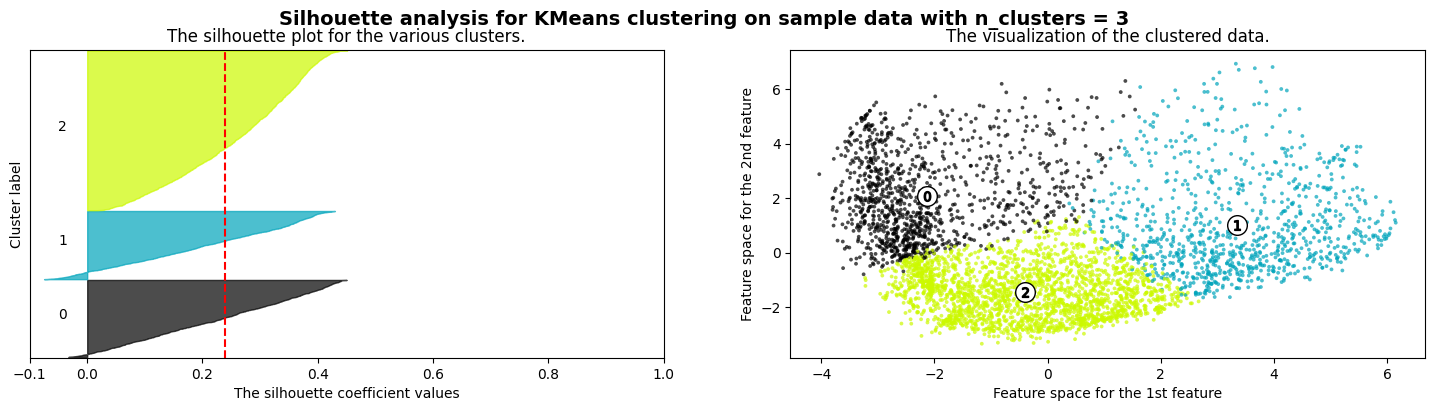

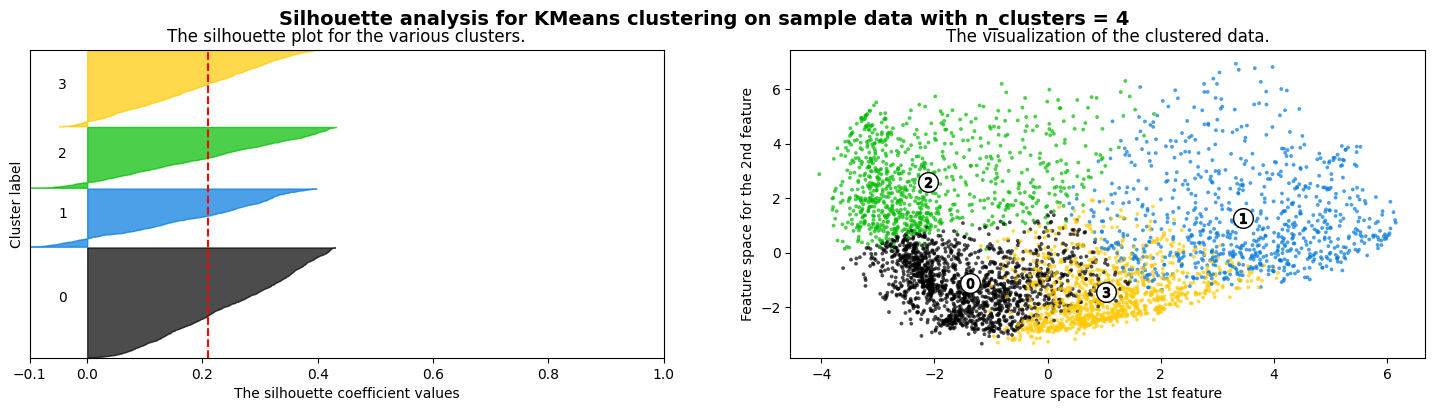

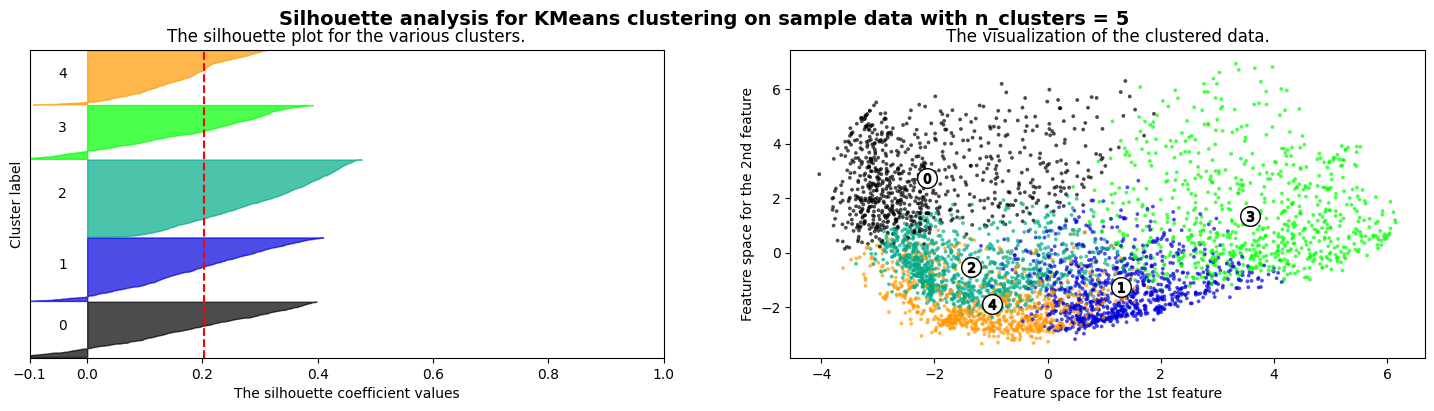

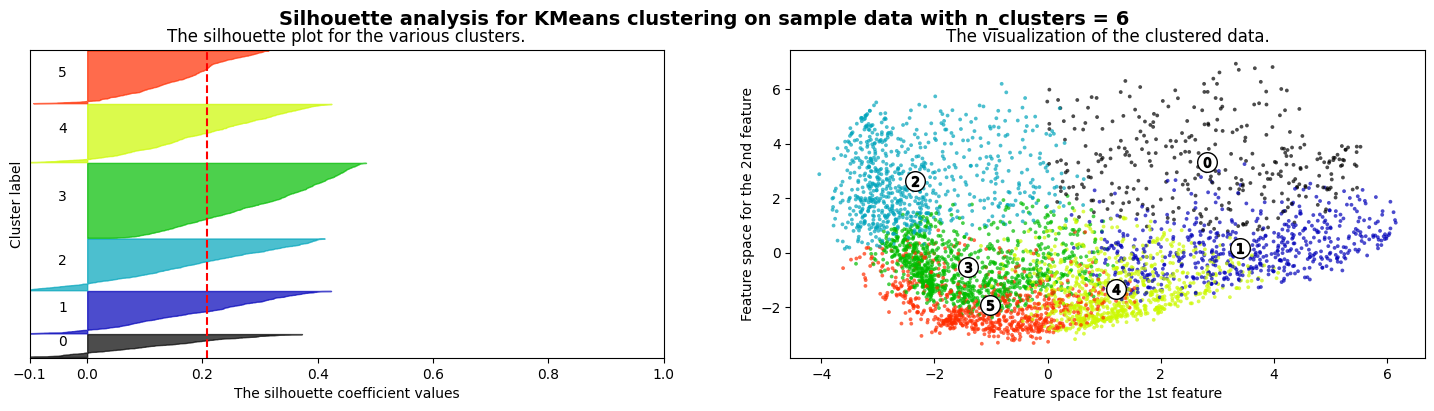

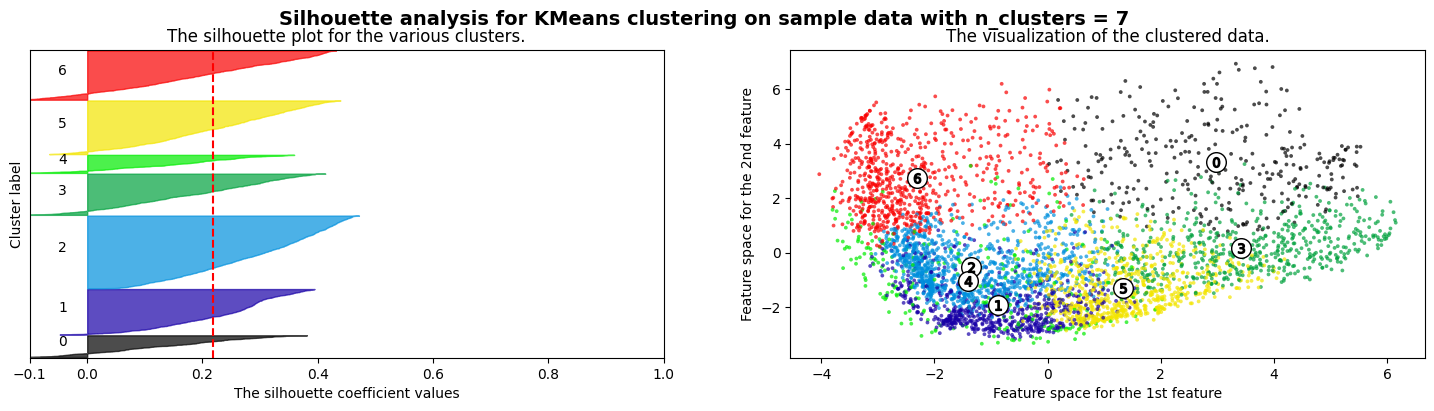

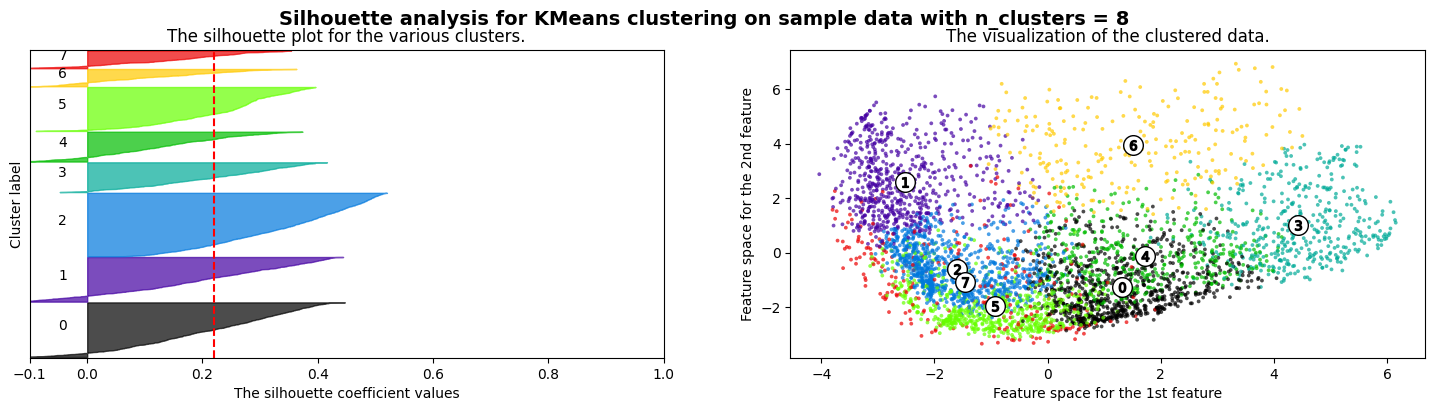

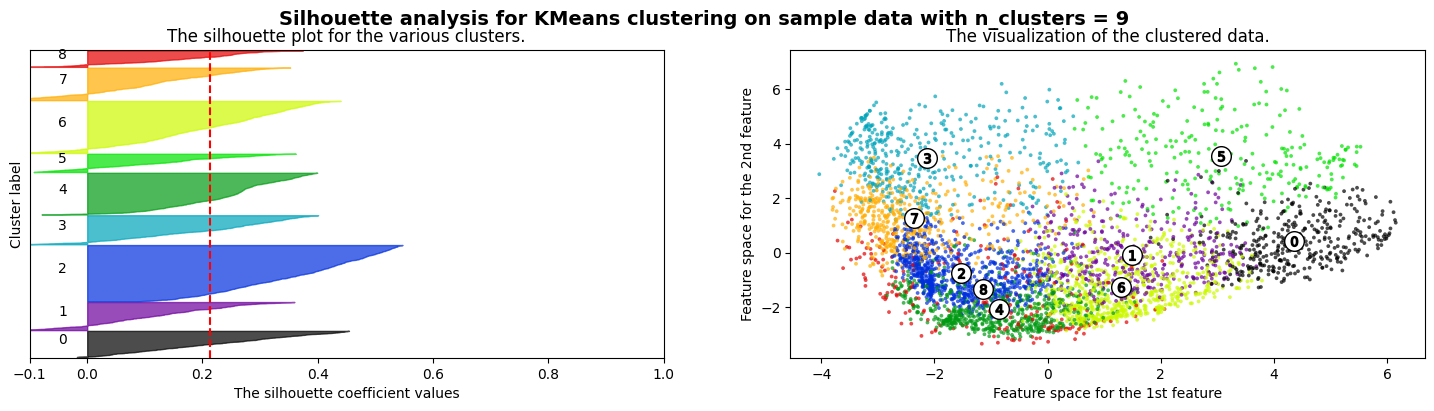

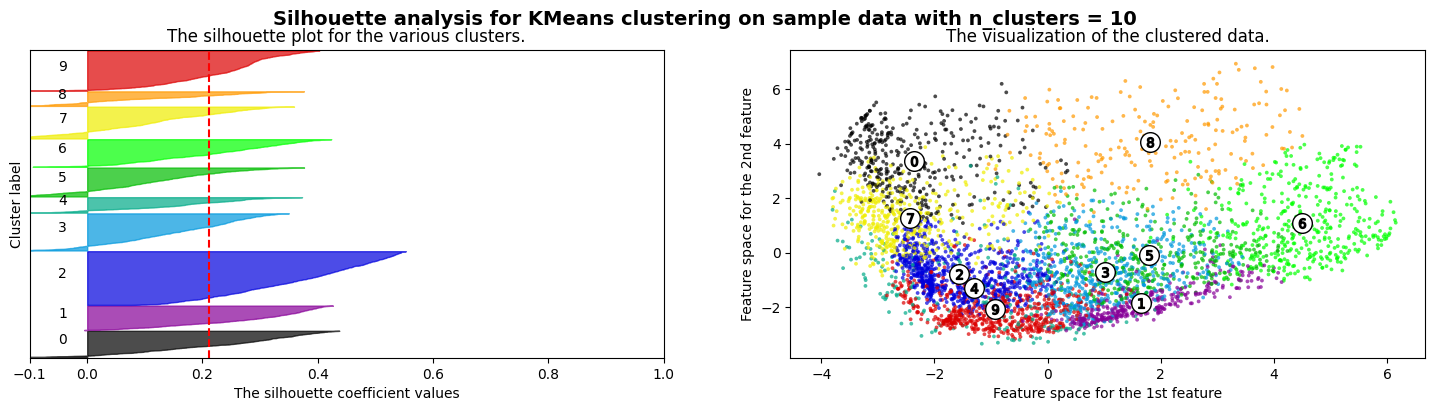

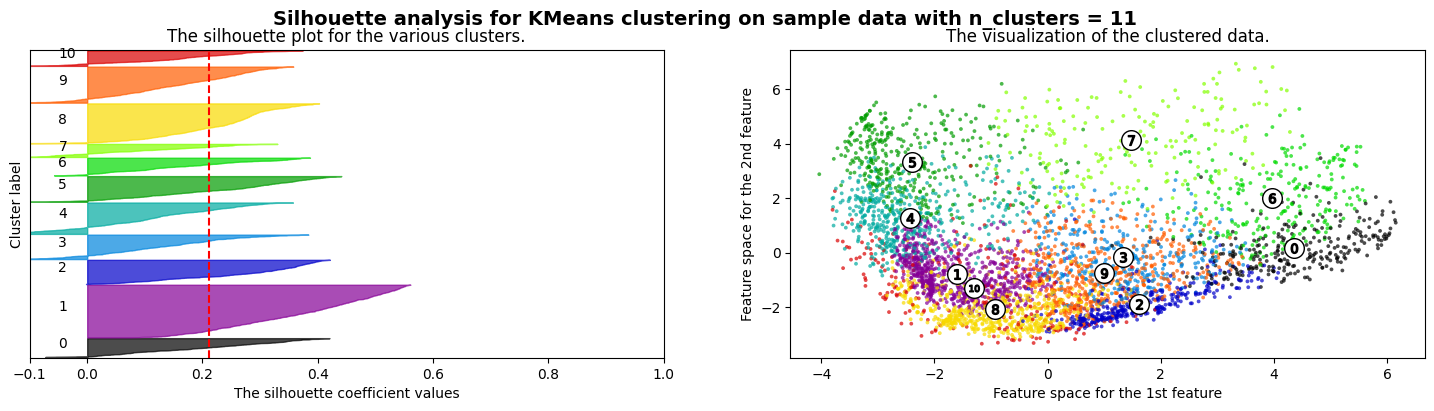

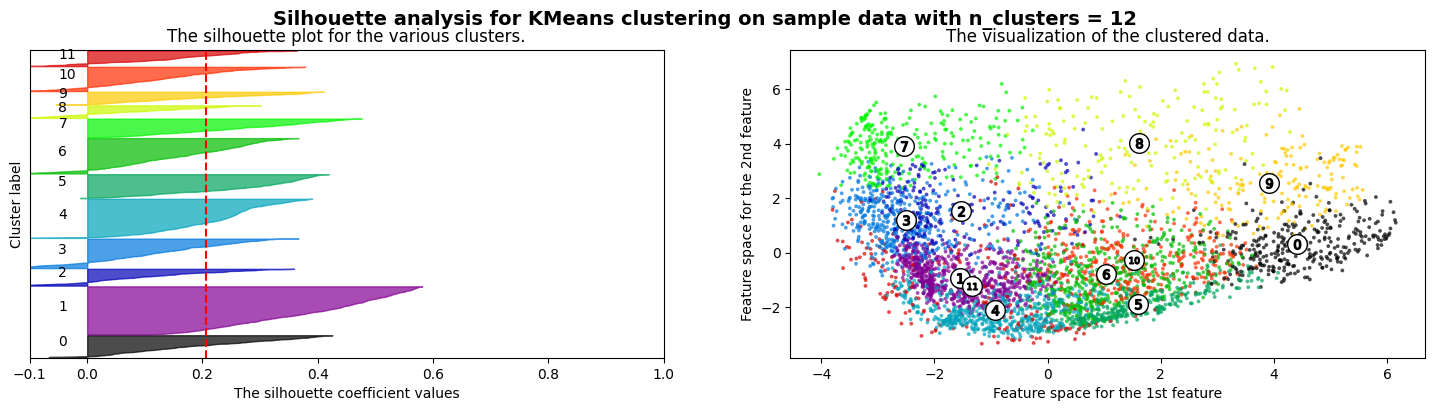

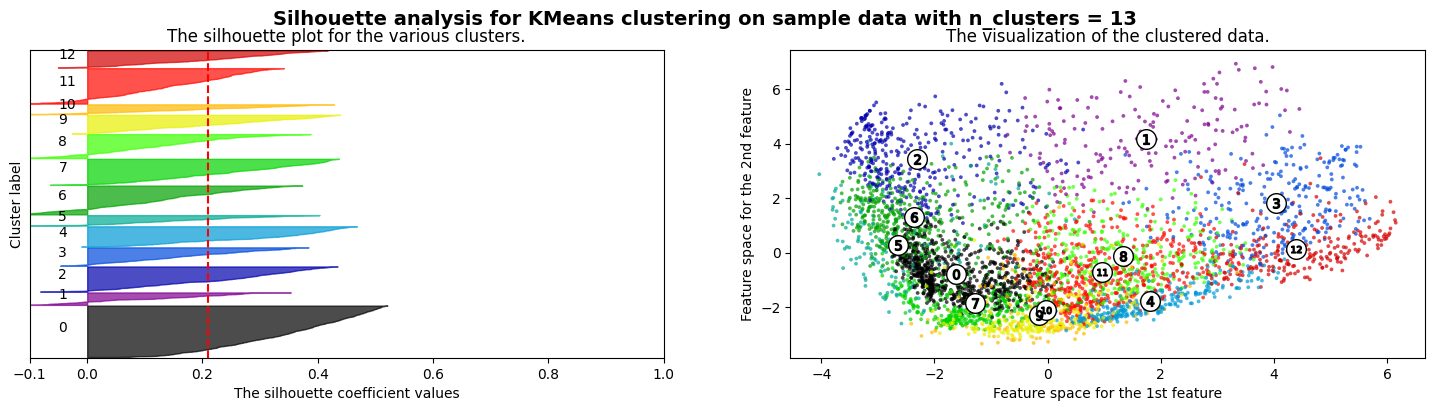

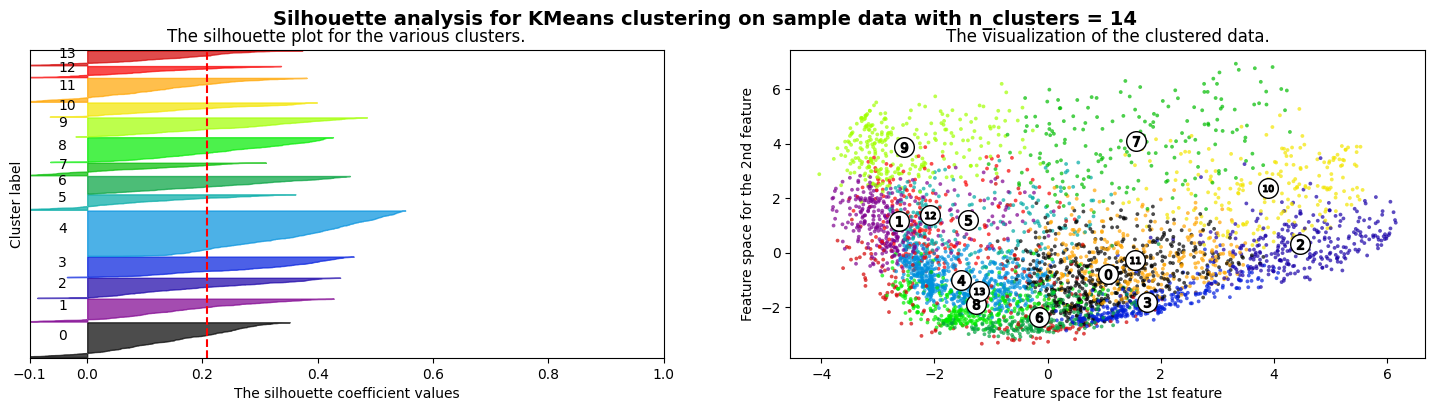

In [399]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

- Based on Silhouette Method we know all the cluster 2-14 is above of average
- The best Silhoutte Value is 3 which have 0.2396058650067568 on score and good visualisation
- Therefore, it can be concluded that based on the Silhouette Plot, the optimal number of clusters is n_clusters=3.

# 8. Model Training

In [426]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

array([2, 2, 2, ..., 0, 0, 0])

The data already be separated into 3 clusters using KMeans

In [427]:
# Insert clustering result into original dataset

data['CLUSTER'] = pred
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2      757.964752              0.875      157.4             157.4   
3      264.566591              0.375     1150.0            1150.0   
4      440.613643              1.000      600.0             600.0   
5      611.561026              1.000      765.0             765.0   
7      105.333584              0.375      306.0             306.0   
...           ...                ...        ...               ...   
4470  9629.808851              1.000        0.0               0.0   
4471  1040.030221              1.000        0.0               0.0   
4472  1322.818587              1.000        0.0               0.0   
4473  1060.391273              1.000        0.0               0.0   
4474  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
2     1494.480376       2638.598410               0.0       8        2  
3     3029.380326         85.428885               0.0       8        2  
4      215.316424        137.846006               0.0       8        2  
5      204.464151        146.352314               0.0       8        2  
7      101.986927        118.324082               0.0       8        2  
...           ...               ...               ...     ...      ...  
4470  2468.988022       2134.295731               0.0      11        0  
44

Already insert clustering result into original dataset

# 9. Model Evaluation

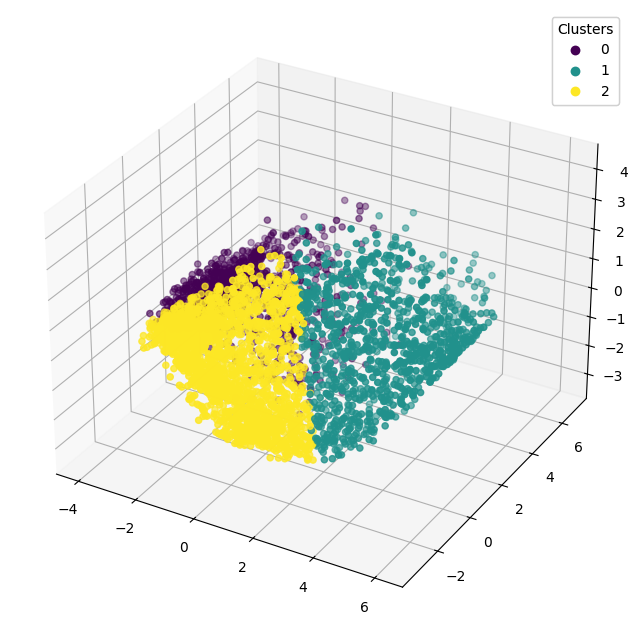

In [402]:

# Membuat dimensi jadi 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(df_scaled)
df_scaled_pca_3d = pca_3d.transform(df_scaled)

#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=data['CLUSTER'], cmap='viridis')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

* Based on 3D visualization, it can be seen that a cluster has been formed. However, due to the small value of the silhouette score, there is overlap in the values ​​of adjacent clusters with other clusters

<Axes: >

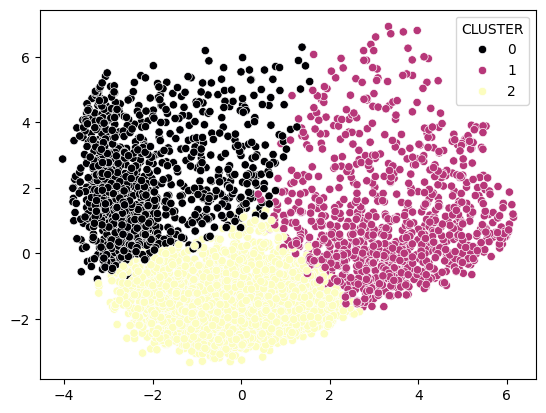

In [429]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=data['CLUSTER'], palette='magma')

* Based on 2D visualization, it can be seen that a cluster has been formed. However, due to the small value of the silhouette score, there is overlap in the values ​​of adjacent clusters with other clusters

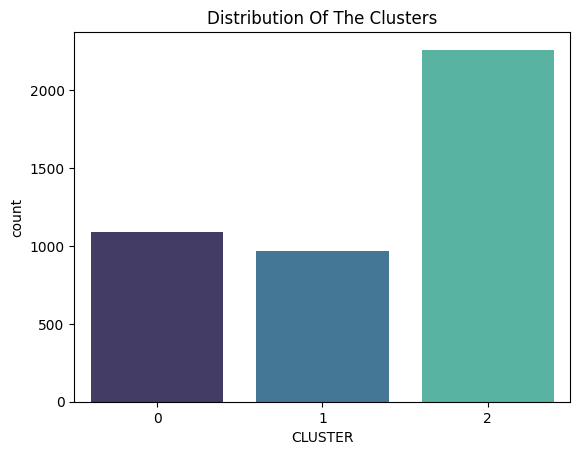

In [436]:
sns.countplot(x=data['CLUSTER'], palette='mako').set_title('Distribution Of The Clusters')
plt.show()

We can see the cluster 2 is the most customers

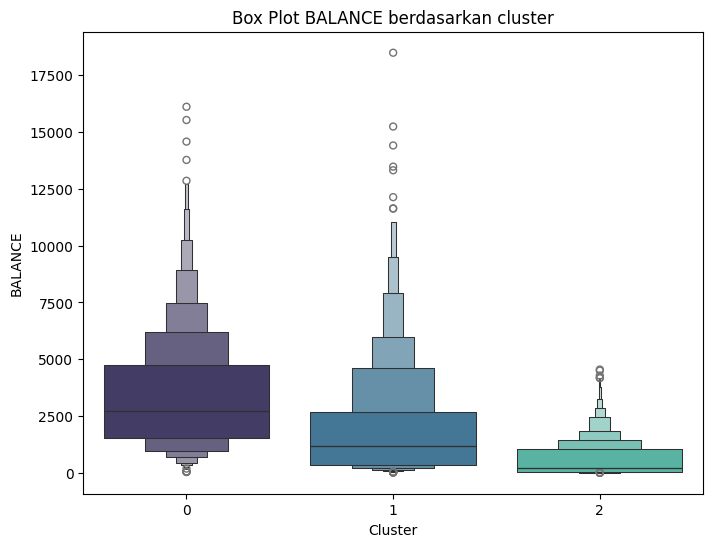

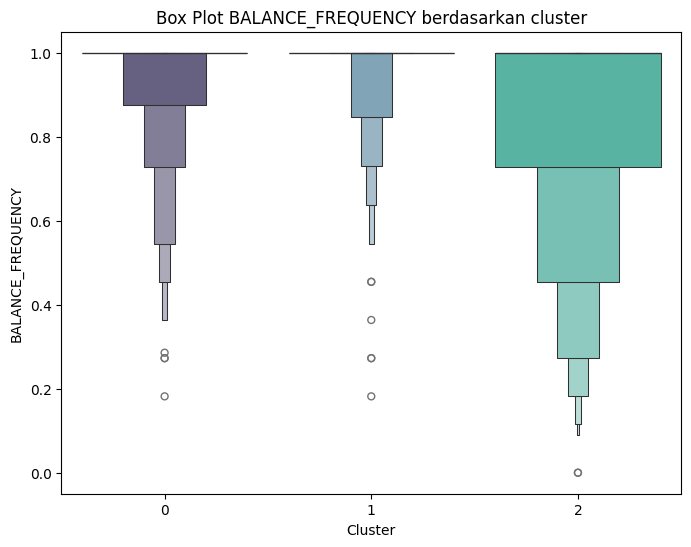

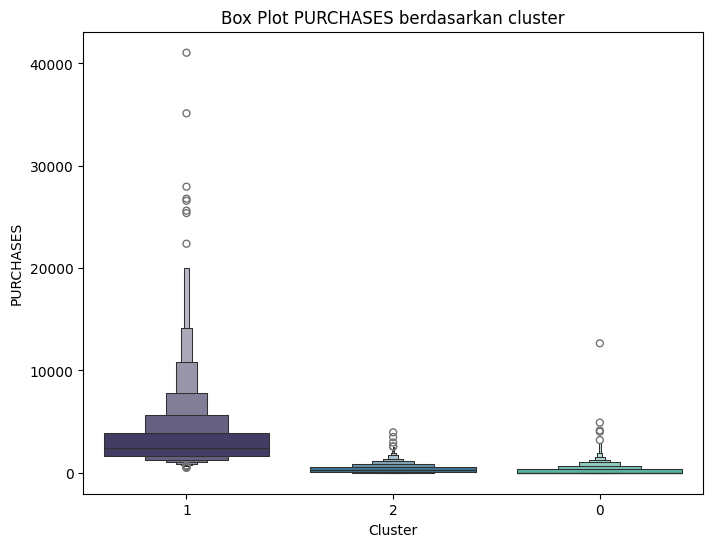

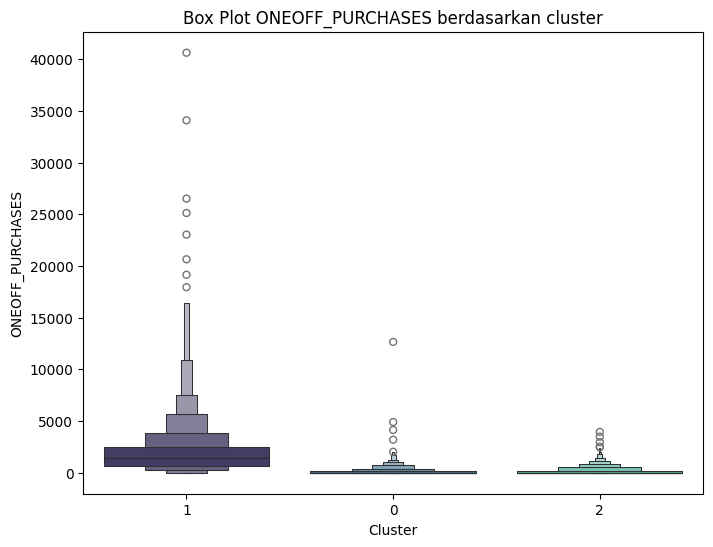

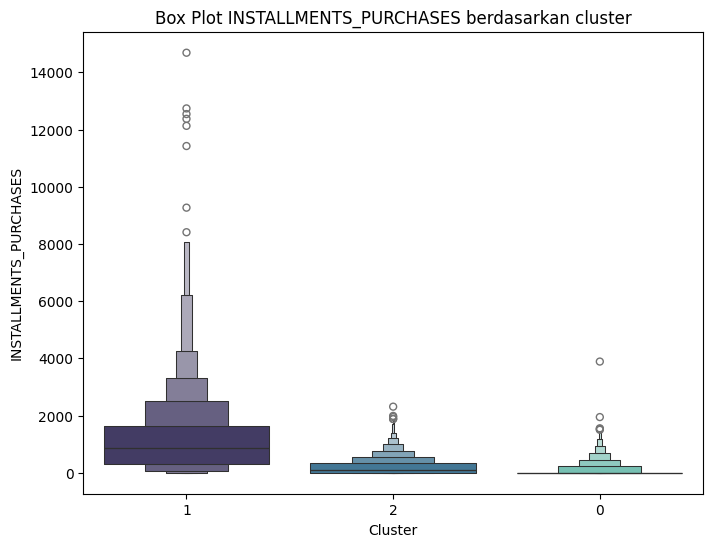

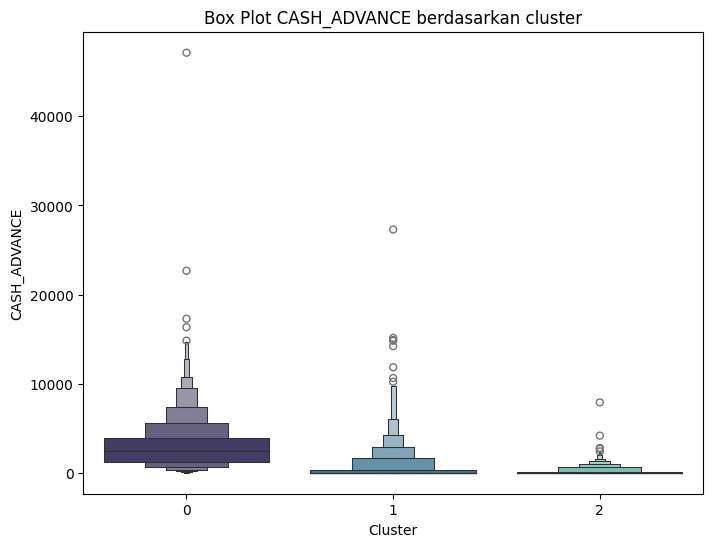

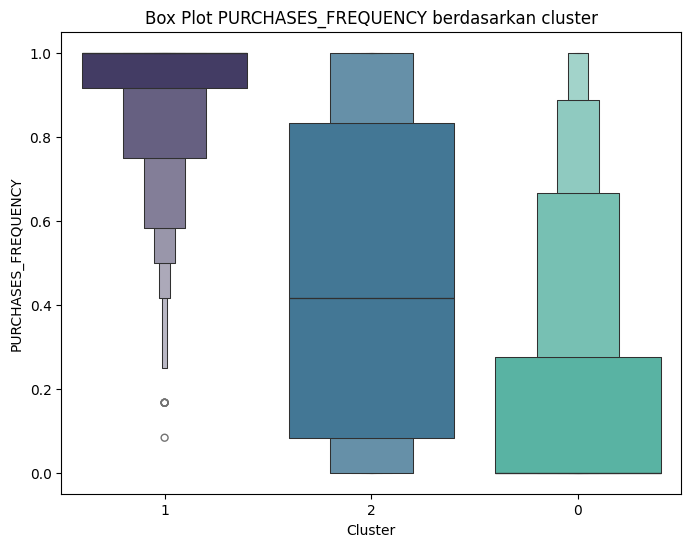

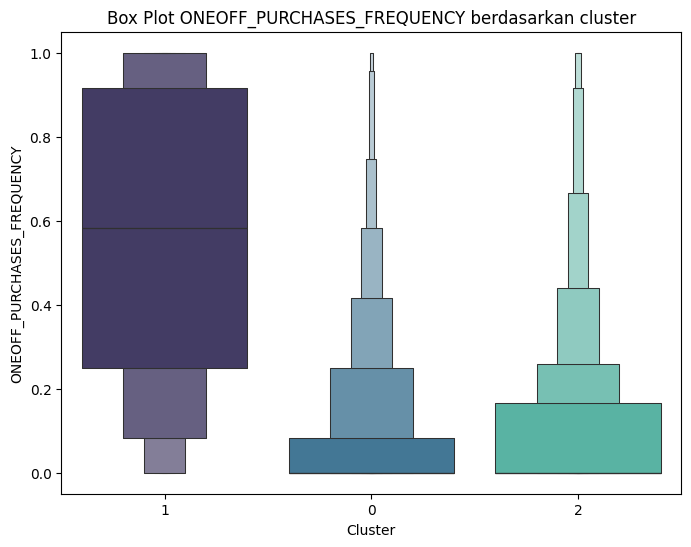

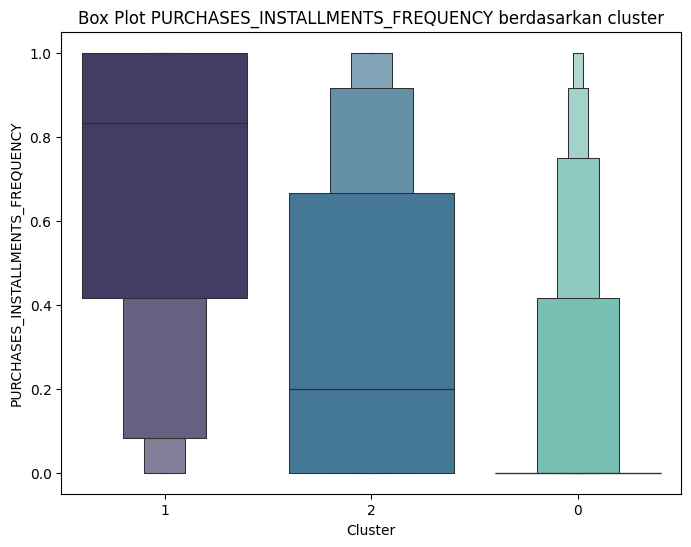

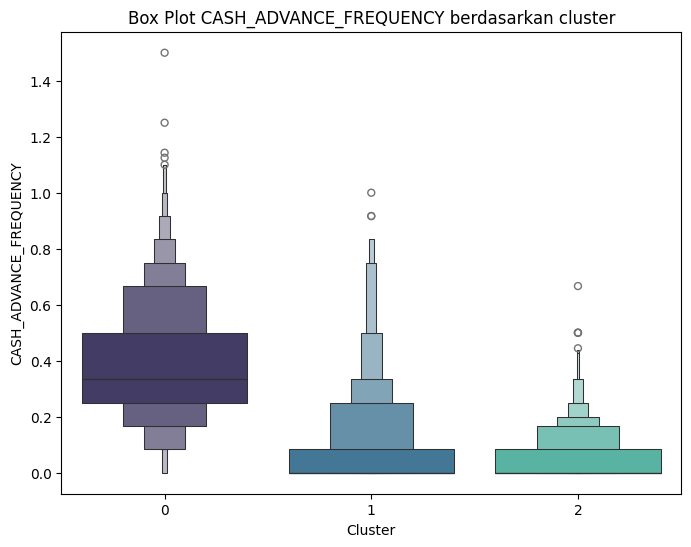

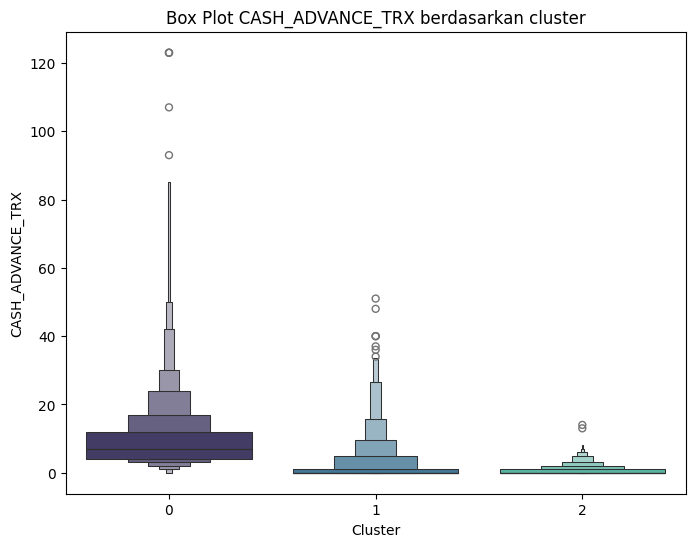

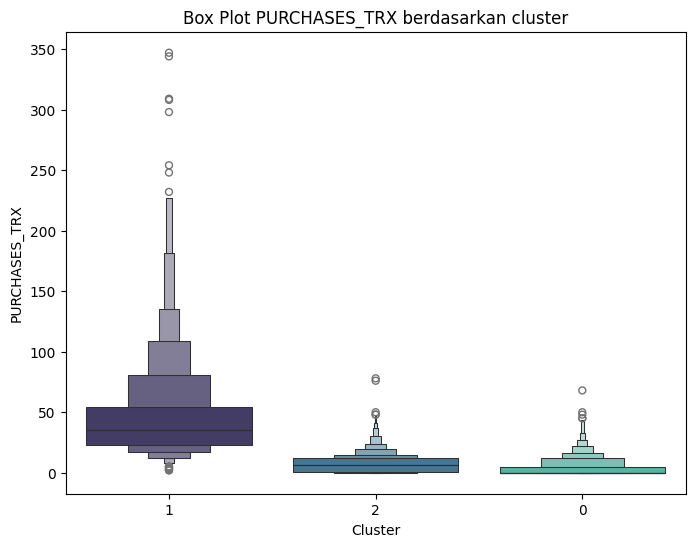

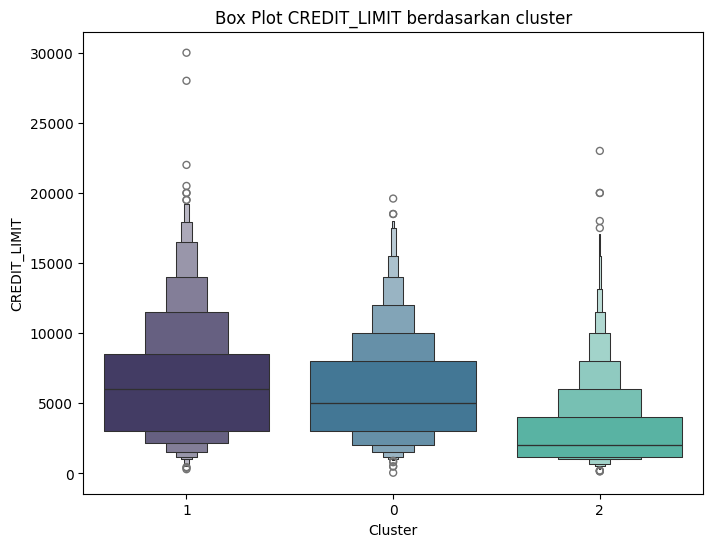

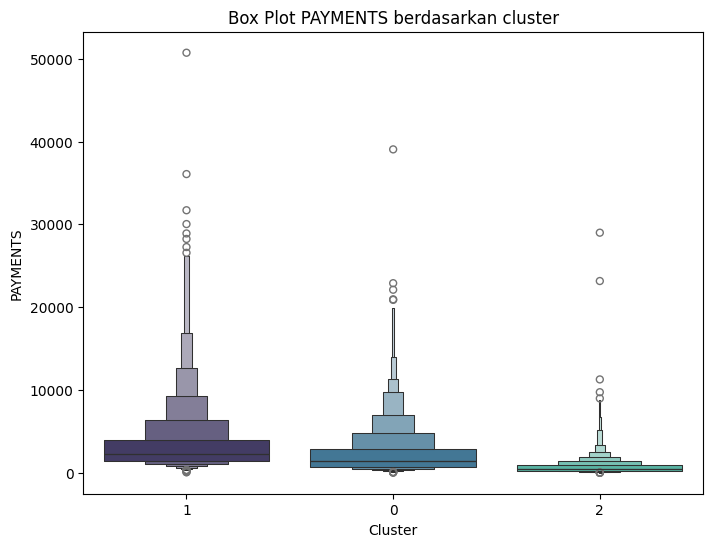

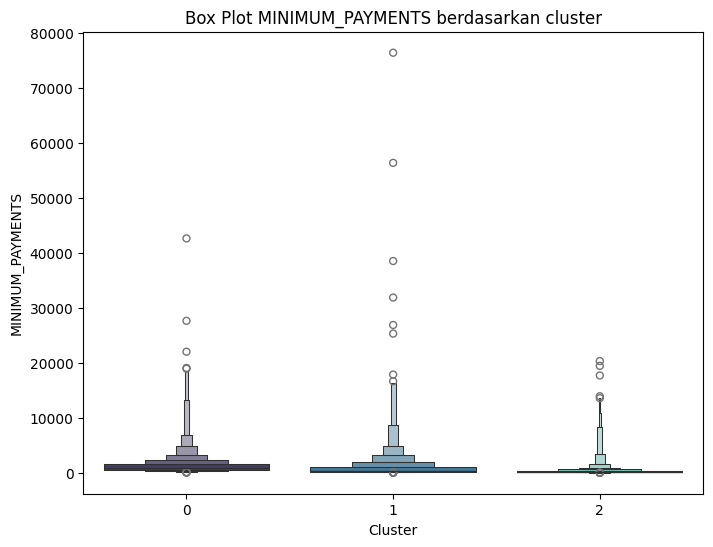

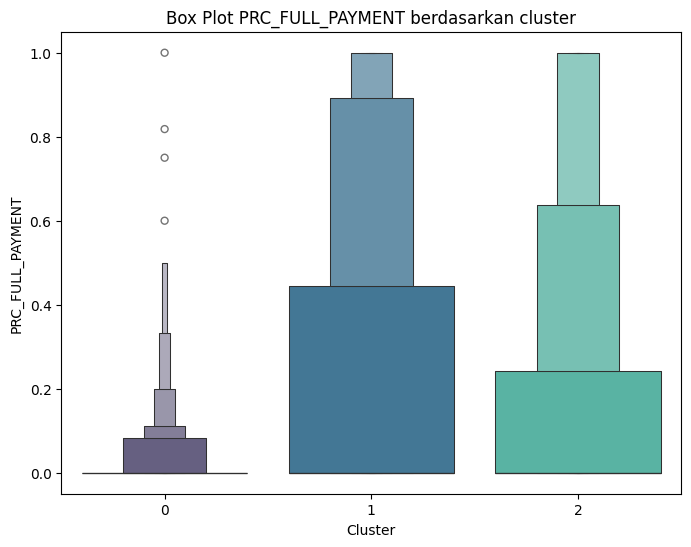

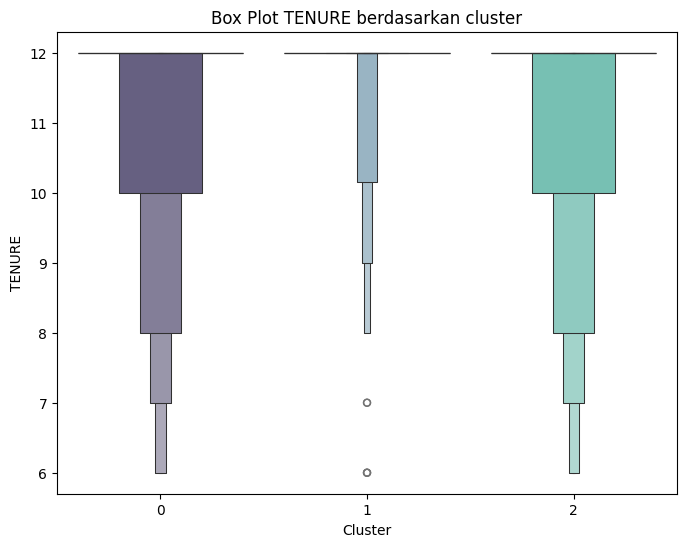

In [440]:
# Distribusi setelah cluster
cluster_col = 'CLUSTER'

for col in data.columns:
    if col != cluster_col:
        plt.figure(figsize=(8,6))
        sns.boxenplot(x=cluster_col, y=col, data=data, order=data.groupby(cluster_col)[col].median().sort_values(ascending=False).index, palette='mako')
        plt.title(f'Box Plot {col} berdasarkan cluster')
        plt.xlabel('Cluster')
        plt.ylabel(col)
        plt.show()

Based on the results of the cluster relationship with each feature, the following things were obtained:
1. In `cluster` against `BALANCE` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
2. In `cluster` against `BALANCE_FREQUENCY` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
3. In `cluster` against `PURCHASES` we get the characteristics of the cluster where the value `cluster 1` > `cluster 2` > `cluster 0`
4. In `cluster` against `ONEOFF_PURCHASES` we get the characteristics of the cluster where the value `cluster 1` > `cluster 0` > `cluster 2`
5. In `cluster` against `INSTALLMENTS_PURCHASES` we get the characteristics of the cluster where the value `cluster 1` > `cluster 2` > `cluster 0`
6. In `cluster` against `CASH_ADVANCE` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
7. In `cluster` against `PURCHASES_FREQUENCY` we get the characteristics of the cluster where the value `cluster 1` > `cluster 2` > `cluster 0`
8. In `cluster` against `ONEOFF_PURCHASES_FREQUENCY` we get the characteristics of the cluster where the value `cluster 1` > `cluster 0` > `cluster 2`
9. In `cluster` against `PURCHASES_INSTALLMENTS_FREQUENCY` we get the characteristics of the cluster where the value `cluster 1` > `cluster 2` > `cluster 0`
10. In `cluster` againts  t `CASH_ADVANCE_FREQUENCY` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
11. In `cluster` againts  t `CASH_ADVANCE_TRX` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
12. In `cluster` againts  t `PURCHASES_TRX` we get the characteristics of the cluster where the value `cluster 1` > `cluster 2` > `cluster 0`
13. In `cluster` againts  t `CREDIT_LIMIT` we get the characteristics of the cluster where the value `cluster 1` > `cluster 0` > `cluster 2`
14. In `cluster` againts  t `PAYMENTS` we get the characteristics of the cluster where the value `cluster 1` > `cluster 0` > `cluster 2`
15. In `cluster` againts  t `MINIMUM_PAYMENTS` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
16. In `cluster` againts  t `PRC_FULL_PAYMENT` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`
17. In `cluster` againts  t `TENURE` we get the characteristics of the cluster where the value `cluster 0` > `cluster 1` > `cluster 2`


We can identify three distinct clusters with different characteristics:

Cluster 0:

- High balance and cash advance users
- High frequency of cash advance transactions
- High minimum payments and full payment rates
- Lower purchases and installment purchases
- Lower credit limits
- Longer tenure

Cluster 1:

- High purchases and installment purchases users
- High frequency of purchases and installment purchases
- Higher credit limits
- Higher payments
- Lower balance and cash advance users
- Lower minimum payments and full payment rates
- Longer tenure

Cluster 2:

- Lower values across most features
- Lower balance, purchases, and cash advance users
- Lower frequency of transactions
- Lower credit limits
- Lower payments
- Shorter tenure

# 10. Model Saving

In [403]:
# Model Saving
with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('model.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

Saving the model as file

# 11. Model Inference

In [404]:
# Load Model

with open("scaler.pkl", "rb") as file_1:
  scaler = pickle.load(file_1)

with open("pca.pkl", "rb") as file_2:
  pca = pickle.load(file_2)

with open("model.pkl", "rb") as file_3:
  model = pickle.load(file_3)

Load the model that we already save

In [405]:
# Making a randomized dataset for inference

# Generate random data
num_samples = 150

random_data = {
    'BALANCE': np.random.uniform(0, 10000, num_samples),
    'BALANCE_FREQUENCY': np.random.uniform(0, 1, num_samples),
    'PURCHASES': np.random.uniform(0, 10000, num_samples),
    'ONEOFF_PURCHASES': np.random.uniform(0, 5000, num_samples),
    'INSTALLMENTS_PURCHASES': np.random.uniform(0, 5000, num_samples),
    'CASH_ADVANCE': np.random.uniform(0, 5000, num_samples),
    'PURCHASES_FREQUENCY': np.random.uniform(0, 1, num_samples),
    'ONEOFF_PURCHASES_FREQUENCY': np.random.uniform(0, 1, num_samples),
    'PURCHASES_INSTALLMENTS_FREQUENCY': np.random.uniform(0, 1, num_samples),
    'CASH_ADVANCE_FREQUENCY': np.random.uniform(0, 1, num_samples),
    'CASH_ADVANCE_TRX': np.random.randint(0, 100, num_samples),
    'PURCHASES_TRX': np.random.randint(0, 100, num_samples),
    'CREDIT_LIMIT': np.random.uniform(0, 20000, num_samples),
    'PAYMENTS': np.random.uniform(0, 10000, num_samples),
    'MINIMUM_PAYMENTS': np.random.uniform(0, 1000, num_samples),
    'PRC_FULL_PAYMENT': np.random.uniform(0, 1, num_samples),
    'TENURE': np.random.randint(1, 12*10, num_samples)
}
# Convert to DataFrame
data_inf= pd.DataFrame(random_data)

# Display the DataFrame
data_inf.head()


BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  4943.492865           0.211253  4588.129697        567.386683   
1  5579.302026           0.050860  2166.522566        379.767225   
2  4947.876059           0.802437  4293.002278       4918.493175   
3  1690.258609           0.888482  1795.163613       2342.961859   
4   266.916650           0.210781  2790.302638       2575.316448   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             3188.706706    524.358199             0.504593   
1               58.070149   4998.955070             0.451248   
2             2195.168917    614.426762             0.999961   
3             3092.846785   3632.291519             0.918512   
4             2478.517660    717.719499             0.114777   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.528354                          0.709817   
1                    0.326310                          0.464792   
2                    0.903234                          0.320039   
3                    0.967382                          0.338080   
4                    0.921645                          0.797078   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.523804                79             40   6747.255258   
1                0.201750                40             75   9594.406623   
2                0.668288                34             26  11196.426225   
3                0.866949                80             97   6579.715924   
4                0.316527                52             29    599.404871   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  9030.726350         44.114030          0.413294      25  
1  7002.573893         19.722950          0.787319      57  
2  7574.616576        394.641614          0.463619      74  
3  1174.447114         35.223206          0.263078     111  
4  2093.663735         58.154558          0.446620      65

Making random dataset for Model Inference

In [406]:
# Scaling
data_scaled = scaler.transform(data_inf)

# PCA 
data_scaled_pca = pca.transform(data_scaled)
data_scaled_pca

array([[  2.20687351,  11.04343164,   0.05444538, ...,  -5.75459201,
         -3.15958093,  -5.54815011],
       [  2.61363635,   7.78555708,   4.38345179, ..., -12.12846285,
         -9.75286238,  -0.31159781],
       [  9.46511194,  11.26501862,   6.30224406, ..., -12.51915755,
         -7.13002274,  -5.6512239 ],
       ...,
       [  6.36450785,  14.00341326,   0.43656121, ..., -13.50361578,
         -5.17596929, -10.51262283],
       [ 13.78667101,  10.9647981 ,   6.7022636 , ..., -12.43798201,
         -9.40327073,  -8.02722215],
       [ 10.93252315,  12.12399118,   0.50003005, ..., -14.29563177,
         -4.51837971, -10.0177097 ]])

Finish scaling and dimensional reduction of random dataset

In [407]:
# Predict
km_pred_inference = model.predict(data_scaled_pca)
km_pred_inference

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

Showing the result of prediction

In [408]:
# Insert clustering result into inferennce dataset

data_inf['CLUSTER'] = km_pred_inference
data_inf

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0    4943.492865           0.211253  4588.129697        567.386683   
1    5579.302026           0.050860  2166.522566        379.767225   
2    4947.876059           0.802437  4293.002278       4918.493175   
3    1690.258609           0.888482  1795.163613       2342.961859   
4     266.916650           0.210781  2790.302638       2575.316448   
..           ...                ...          ...               ...   
145  8098.347684           0.422784  9477.080645       2271.808514   
146  9771.841376           0.420169  9238.749912       4737.380007   
147  6934.383412           0.963563  7284.369962       1600.502730   
148  8665.130495           0.594236  8702.861269       4739.176582   
149  2887.252546           0.928758  8977.471579       1079.880102   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               3188.706706    524.358199             0.504593   
1                 58.070149   4998.955070             0.451248   
2               2195.168917    614.426762             0.999961   
3               3092.846785   3632.291519             0.918512   
4               2478.517660    717.719499             0.114777   
..                      ...           ...                  ...   
145             3241.754478   1552.392720             0.760221   
146             4078.992811    273.642231             0.835596   
147             3145.016039    401.704815             0.429671   
148             3000.315069   3537.190790             0.206318   
149             3948.155087   2720.509125             0.499817   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      0.528354                          0.709817   
1                      0.326310                          0.464792   
2                      0.903234                          0.320039   
3                      0.967382                          0.338080   
4                      0.921645                          0.797078   
..                          ...                               ...   
145                    0.659887                          0.063992   
146                    0.458578                          0.204091   
147                    0.486550                          0.134336   
148                    0.905067                          0.611179   
149                    0.525029                          0.752750   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  0.523804                79             40   6747.255258   
1                  0.201750                40             75   9594.406623   
2                  0.668288                34             26  11196.426225   
3                  0.866949                80             97   6579.715924   
4                  0.316527                52             29    599.404871   
..                      ...               ...            ...           ...   
145                0.034250                42             35   5169.052981   
146                0.978669                77             47   2230.341912   
147                0.143506                78             65  10799.308697   
148                0.466336                13             78   7303.146985   
149                0.806068                38             83  19248.386850   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0    9030.726350         44.114030          0.413294      25        0  
1    7002.573893         19.722950          0.787319      57        1  
2    7574.616576        394.641614          0.463619      74        1  
3    1174.447114         35.223206          0.263078     111        1  
4    2093.663735         58.154558          0.446620      65        1  
..           ...               ...               ...     ...      ...  
145  4620.482209        551.079626          0.679901      74        1  
146  3904.809963        165.11407

Inserting clustering result into inference dataset

<Axes: >

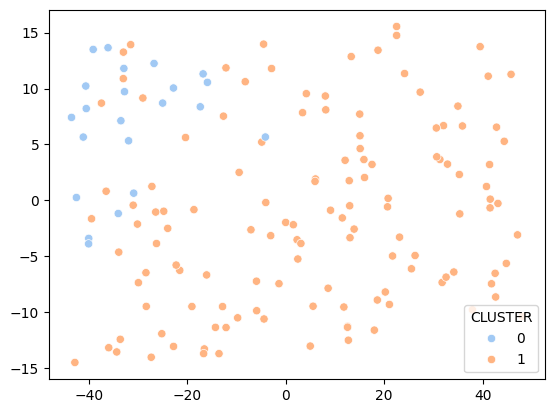

In [441]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(data_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=data_inf['CLUSTER'], palette='pastel')

Model finish clustering data random

# 12. Conclusion

## EDA:

- We can see from the visualisation there is 84,4% of distribution on 12 month Tenure meanwhile less than 5% for 6, 7, 8, 9, 10, 11 Tenure
- From the visualisation we know the data is skewed and have high kurtosis. So it means the data have so much outlier and we already handle it in Feature Engineering
- We already handling the outlier and missing value in Feature Engineering to maximize our analysis

## Model:

- We already clustering the dataset using KMeans method and model has been trained
- After using Elbow and Silhoutte Method we already got the best number of clusters as 3 which have 0.2396058650067568 on score and good visualisation

- We already succesfully clustering the dataset random

- After model evaluation we can identify three distinct cluster with different characteristics:

    Cluster 0:

    - High balance and cash advance users
    - High frequency of cash advance transactions
    - High minimum payments and full payment rates
    - Lower purchases and installment purchases
    - Lower credit limits
    - Longer tenure (similar to Cluster 1)

    Cluster 1:

    - High purchases and installment purchases users
    - High frequency of purchases and installment purchases
    - Higher credit limits
    - Higher payments
    - Lower balance and cash advance users
    - Lower minimum payments and full payment rates
    - Longer tenure (similar to Cluster 0)

    Cluster 2:

    - Lower values across most features
    - Lower balance, purchases, and cash advance users
    - Lower frequency of transactions
    - Lower credit limits
    - Lower payments
    - Shorter tenure

In this model we are using the K-Means algorithm, we can experiment with different clustering algorithms like `DBSCAN`, or `hierarchical` clustering. Different algorithms may perform better on different types of datasets.


## Business Insight:

#### Clusters suggest that customers can be segmented into three groups based on their behavior:

- High-balance, cash-advance users (Cluster 0): These customers tend to have higher balances and use cash advance more frequently. They also make higher minimum payments and have a higher full payment rate.
- High-purchase, installment users (Cluster 1): These customers tend to make more purchases and have higher credit limits. They also make higher payments, but have lower minimum payments and full payment rates compared to Cluster 0.
- Low-activity users (Cluster 2): These customers tend to have lower values across most features, indicating lower activity and engagement with the credit card.

#### Recommendations:
- Cluster 0: You can target these customers with offers that encourage them to pay off their balance or switch to a lower interest credit card. Additionally, you can offer financial management tools to help them better manage their spending.

- Cluster 1: They may be good candidates for rewards-based credit cards or promotional offers that encourage them to continue using their card for purchases. You can also offer installment payment plans for big-ticket items to attract these customers.

- Cluster 2: You can target these customers with educational resources and tools to help them better understand and manage their credit. Additionally, you can offer low-interest balance transfer promotions to help them pay off their debt.